<a href="https://colab.research.google.com/github/TeguhFerdian/Final_project/blob/main/Pandas_Lovers_Holiday_Package_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project: Holiday Package Prediction**
Pandas Lovers <br>
Data Science Batch 32

# **PREPARATION**

**DATASET : HOLIDAY PACKAGE PREDICTION**

**1. PROBLEM STATEMENT**

Perusahaan traveling 'Trips & Travel.Com' membuat penawaran paket liburan terbaru. Agar lebih efektif, perusahaan ingin menyelesaikan permasalahan yang ada.
- Pada tahun lalu, hanya 18% pelanggan yang membeli paket liburan yang ditawarkan.
- Revenue perusahaan tidak mengalami peningkatan yang signifikan.

**2. GOAL**

Untuk menaikkan convertion rate dan revenue perusahaan.

**3. OBJECTIVE**

Membuat model untuk memprediksi pelanggan yang akan membeli paket liburan terbaru.

**4. BUSINESS METRICS**
- Total revenue 
- convertion rate

**IMPORT LIBRARY**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import re 
import matplotlib.patches

In [ ]:
import matplotlib
print(matplotlib.__version__)
print(sns.__version__)
print(pd.__version__)

3.7.1
0.12.2
1.5.3


**IMPORT DATASET**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/JodhiKrisantus/DATASET/main/Travel.csv")
df.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# **EDA, INSIGHT & VISUALIZATION**

## **1. Descriptive Statistics**

**QUICK LOOK**

In [ ]:
df.sample(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2997,202997,0,41.0,Self Enquiry,1,9.0,Small Business,Female,3,5.0,Basic,3.0,Single,2.0,1,3,1,2.0,Executive,21020.0
1566,201566,0,24.0,Self Enquiry,3,9.0,Salaried,Female,2,NaN,Deluxe,3.0,Married,1.0,0,4,0,0.0,Manager,19999.0
4503,204503,1,30.0,Self Enquiry,1,7.0,Salaried,Female,3,5.0,Basic,5.0,Married,3.0,1,1,0,1.0,Executive,20997.0
330,200330,0,43.0,Company Invited,1,16.0,Salaried,Female,2,4.0,Deluxe,3.0,Married,2.0,0,3,0,0.0,Manager,20257.0
4737,204737,0,30.0,Company Invited,1,17.0,Salaried,Female,4,4.0,Basic,4.0,Married,2.0,0,5,0,1.0,Executive,21969.0


In [ ]:
#cek kesesuaian tipe data
# TIPE DATA AGE JADIKAN INT
# NumberOfChildrenVisiting,DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, jadi INT.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
#cek kolom kosong
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

**CHECK DATA DUPLIKAT dan VALUE COUNT (CATEGORICAL)**

In [ ]:
print('Banyak Data : ',df.shape)
print('Jumlah Id Customer Duplikat : ',df['CustomerID'].duplicated().sum())
print('Jumlah Data Duplikat',df.duplicated().sum())

Banyak Data :  (4888, 20)
Jumlah Id Customer Duplikat :  0
Jumlah Data Duplikat 0


In [ ]:
mv=df.isnull().sum()
tmv=df.isnull().count()

pmv = mv*100/tmv

mdf = pd.concat([mv,pmv], axis=1)
mdf.columns=['Missing Value Total', 'Missing Value Percentage (%)']
mdf

,Missing Value Total,Missing Value Percentage (%)
CustomerID,0,0.000000
ProdTaken,0,0.000000
Age,226,4.623568
TypeofContact,25,0.511457
CityTier,0,0.000000
DurationOfPitch,251,5.135025
Occupation,0,0.000000
Gender,0,0.000000
NumberOfPersonVisiting,0,0.000000
NumberOfFollowups,45,0.920622


<Axes: >

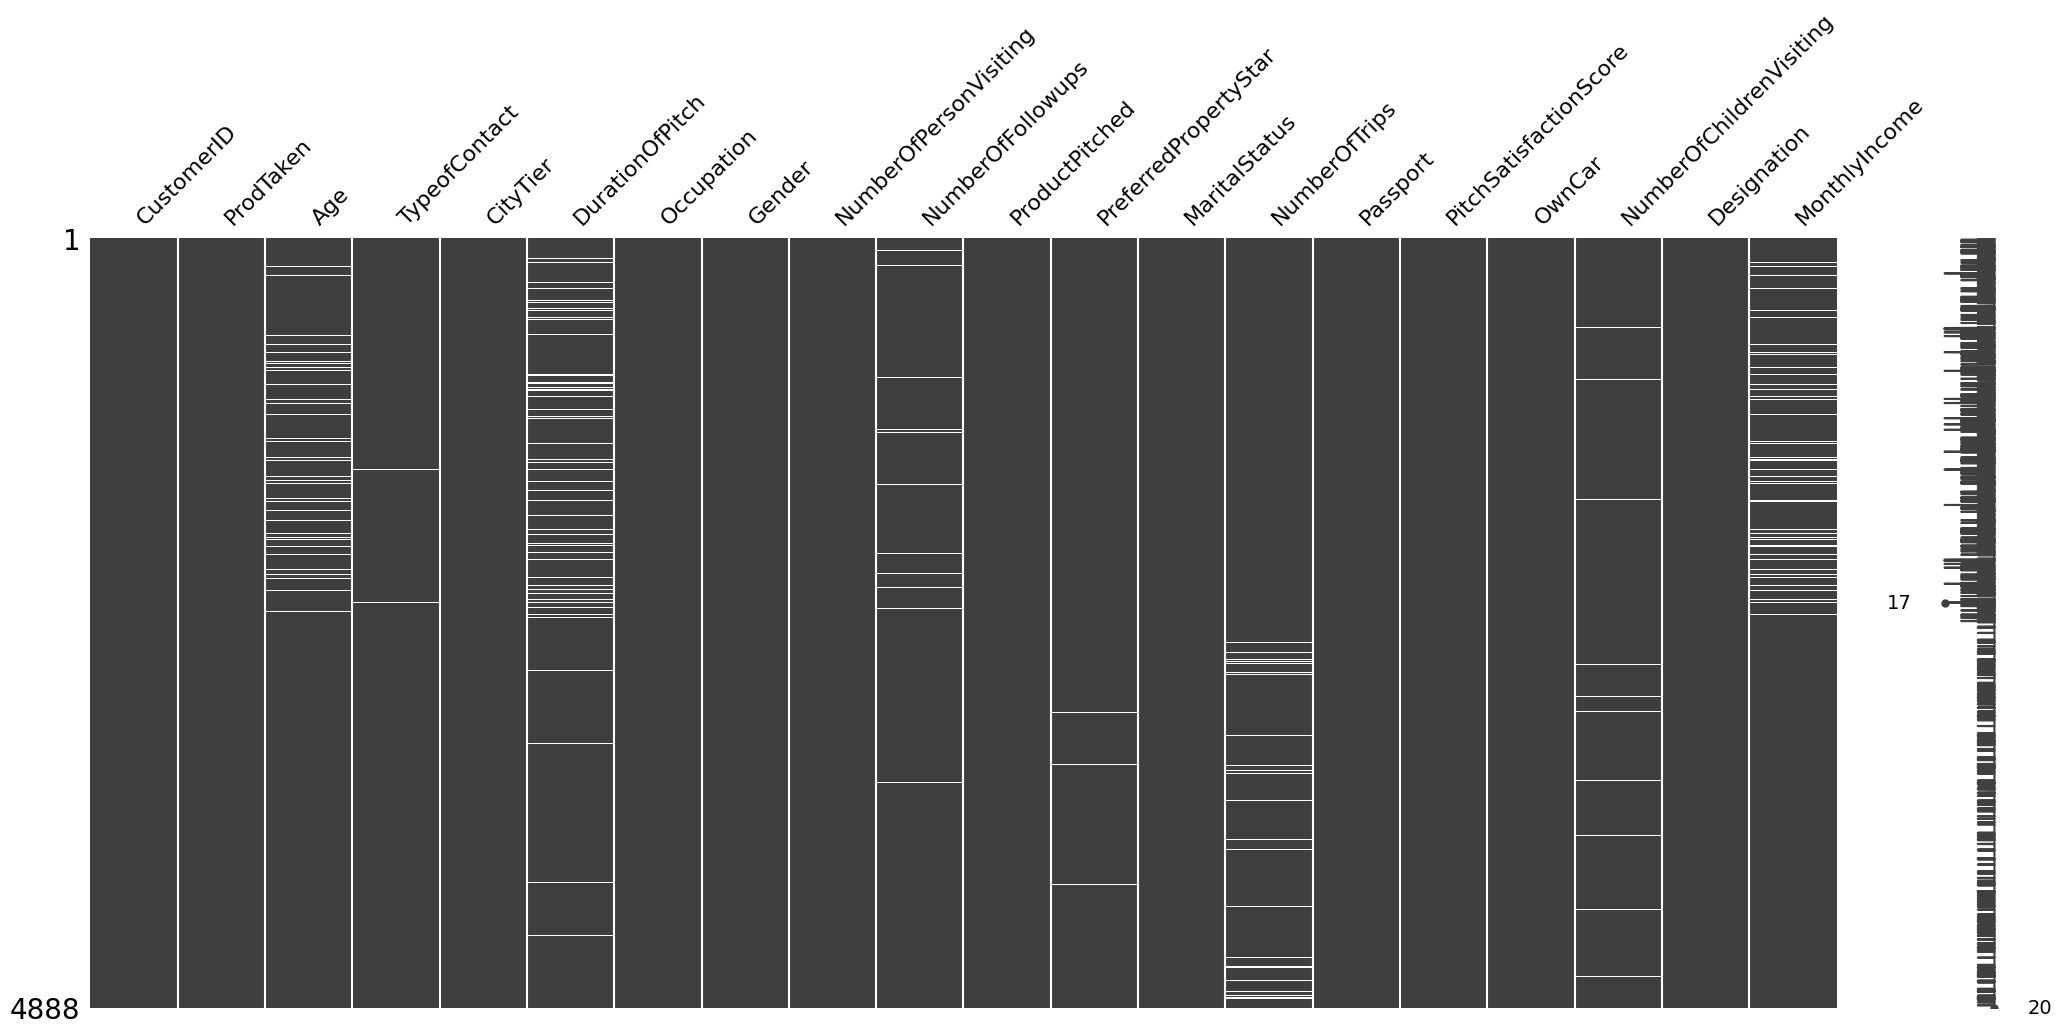

In [ ]:
import missingno as msno
msno.matrix(df)

**HASIL PENGAMATAN**

Berdasarkan output di atas dapat disimpulkan bahwa:

- Tidak terdapat data yang duplikasi

- Terdapat 9 kolom yang memiliki missing value, yaitu kolom `Age`,`TypeofContact`, `DurationOfPitch`,`NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, `NumberOfChildrenVisitin`, `MonthlyIncome`. Teramati 9 kolom memiliki missing value,<5.1% sehingga dapat dikatagorikan masih relatif aman.
- Terdapat kolom dengan tipe data yang tidak tepat. (NumberOfChildrenVisiting,DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, Age)

In [ ]:
# pengelompokan kolom berdasarkan jenisnya
categorical = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']
num         = ['Age','DurationOfPitch','MonthlyIncome']
diskrit     = ['ProdTaken','CityTier','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar',
              'NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar', 'NumberOfChildrenVisiting']

In [ ]:
#cek nilai unik pada kolom categorical
for i in categorical:
    print(df[i].value_counts(), end="\n\n")

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64



**HASIL PENGAMATAN**

- Terdapat missing value pada kolom (Age, TypeofContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome). Sehingga diperlukan adanya handling missing value pada Data Pre-Processing
- Terdapat Typo / Kesalahan input data pada kolom Gender (Male, Female, Fe Male).
- Kolom Marital status, terdapat kesamaan arti pada value (Single, Unmarried)

In [ ]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [ ]:
df[diskrit].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0
OwnCar,4888.0,0.620295,0.485363,0.0,0.0,1.0,1.0,1.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0


In [ ]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


In [ ]:
df[categorical].describe().T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


**HASIL PENGAMATAN**

- Pada kolom NumberOfTrips, terdapat nilai (max = 22) dan (min = 1 ), Sedangkan memiliki mean = 3.23 yang lebih besar dari median = 3.000. mengindikasikan data tersebar pada nilai nilai yang memiliki value yang kecil. Atau bisa disebut terdistribusi (positif skewed)
- Pada kolom MonthlyIncome memiliki mean yang lebih besar dibandingkan nilai mediannya, mengindikasikan sebaran data tersebut yaitu positive skewed.
- Pada kolom monthly income juga memiliki mean yang lebih besar dibandingkan mediannya artinya distribusinya positive skewed.
- Pada kolom monthly income pun terlihat memiliki standard deviation yang sangat tinggi, yang mengartikan terdapat data data yang tersebar sangat jauh dari nilai rata rata, yang kemungkinan menandakan adanya outlier.

## **2. Univariate Analysis**

<ipython-input-18-5144e580968a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num[i]], ax = axes[i], color=colors[i])
<ipython-input-18-5144e580968a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num[i]], ax = axes[i], color=colors[i])
<ipython-input-18-5144e580968a>:6: UserWarning: 

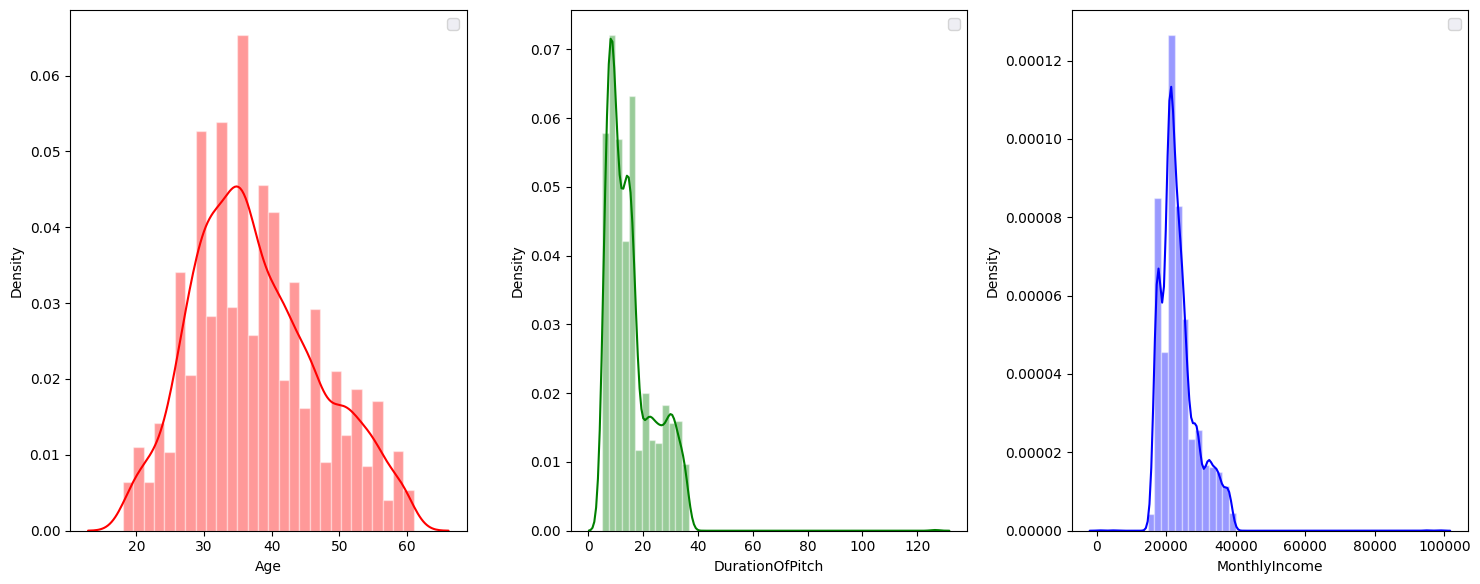

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,6))
sns.set_theme(style="darkgrid", palette="pastel")
colors = ['red', 'green', 'blue']

for i in range(len(num)):
    sns.distplot(df[num[i]], ax = axes[i], color=colors[i]) 
    axes[i].legend()

plt.tight_layout()
plt.show()

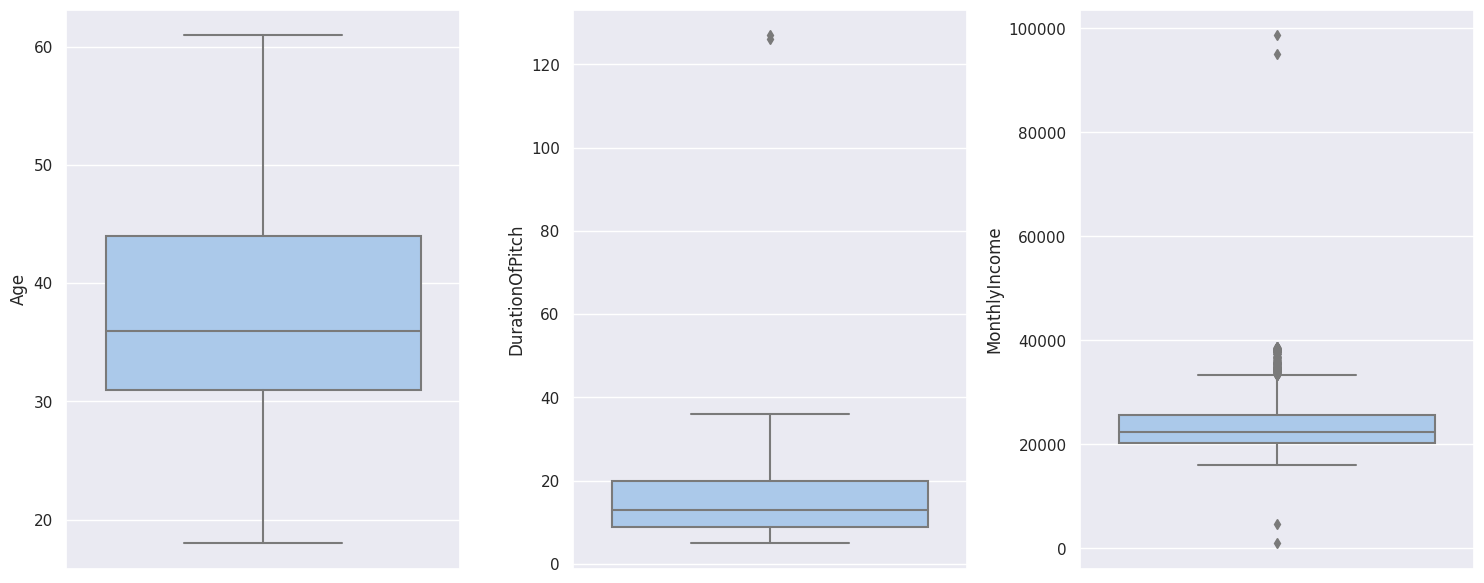

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,6))
for i in range(len(num)):
    sns.boxplot(y=num[i], ax = axes[i], data=df)
plt.tight_layout()
plt.show()

**INSIGHT DISTPLOT & BOXPLOT**

- Pada kolom Age, terlihat data terdistribusi normal
- Pada kolom DurationOfPitch terlihat distribusinya positif skewed dimana kebanyakan frekuensi data tersebar pada nilai <20. terlihat adanya outlier pada nilai > 120
- Pada kolom MonthlyIncome data tersebar pada nilai 20k - 30k. dimana terdapat data outlier pada nilai >80k dan < 10k

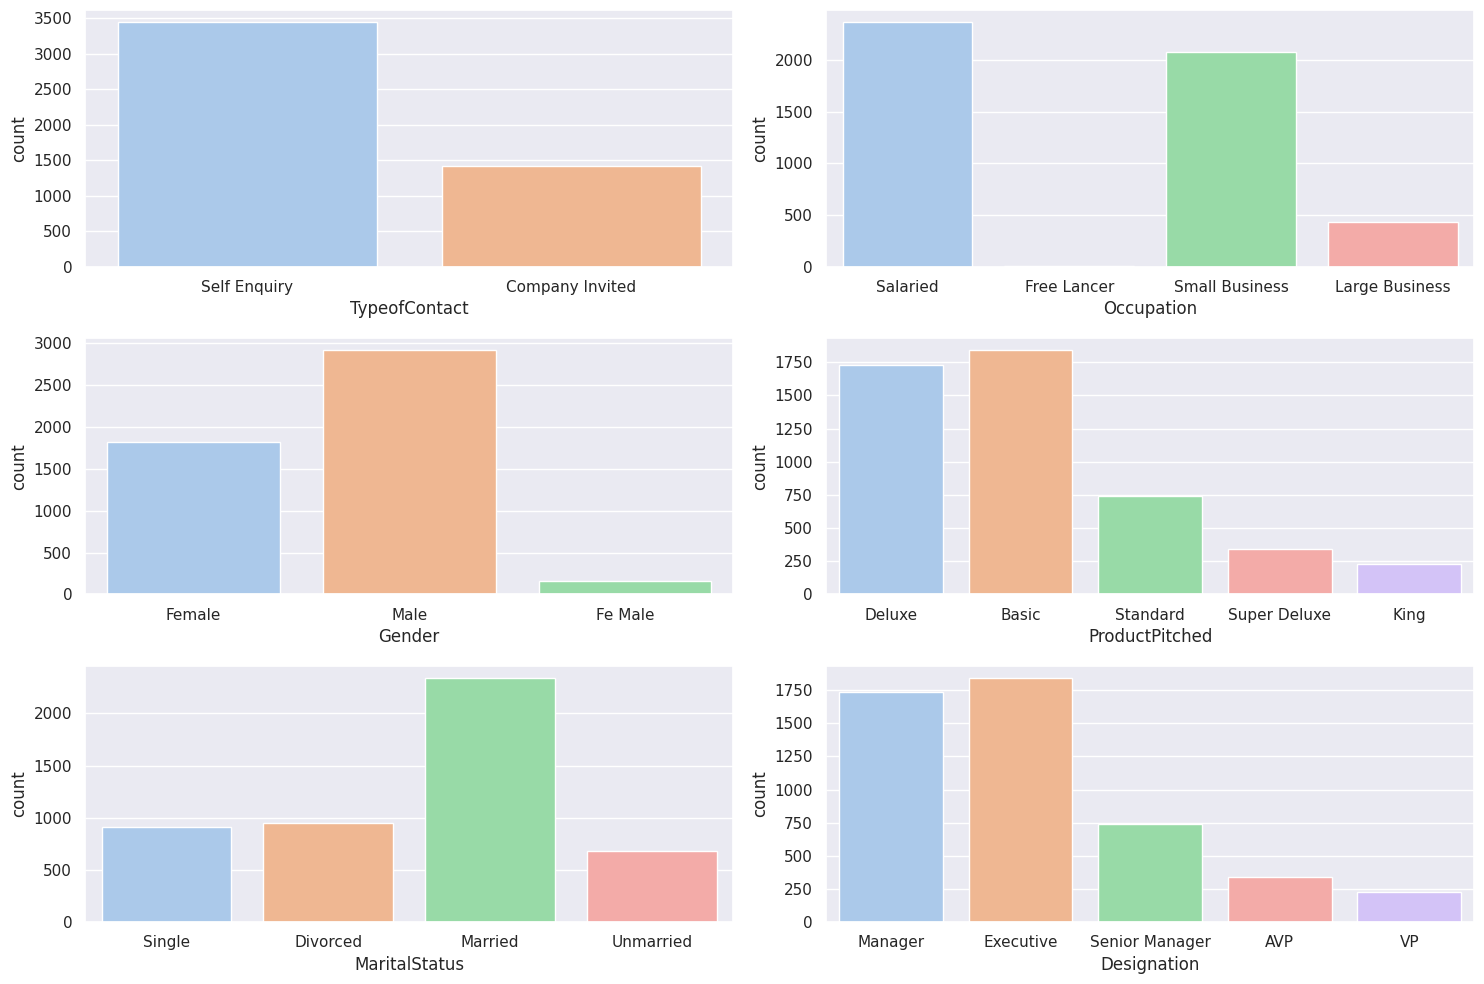

In [ ]:
plt.figure(figsize=(15,10))
for i in range (len(categorical)):
    plt.subplot(3,2, i+1)
    sns.countplot(data=df, x=categorical[i])
    sns.set_theme(style="darkgrid", palette="pastel")
plt.tight_layout()

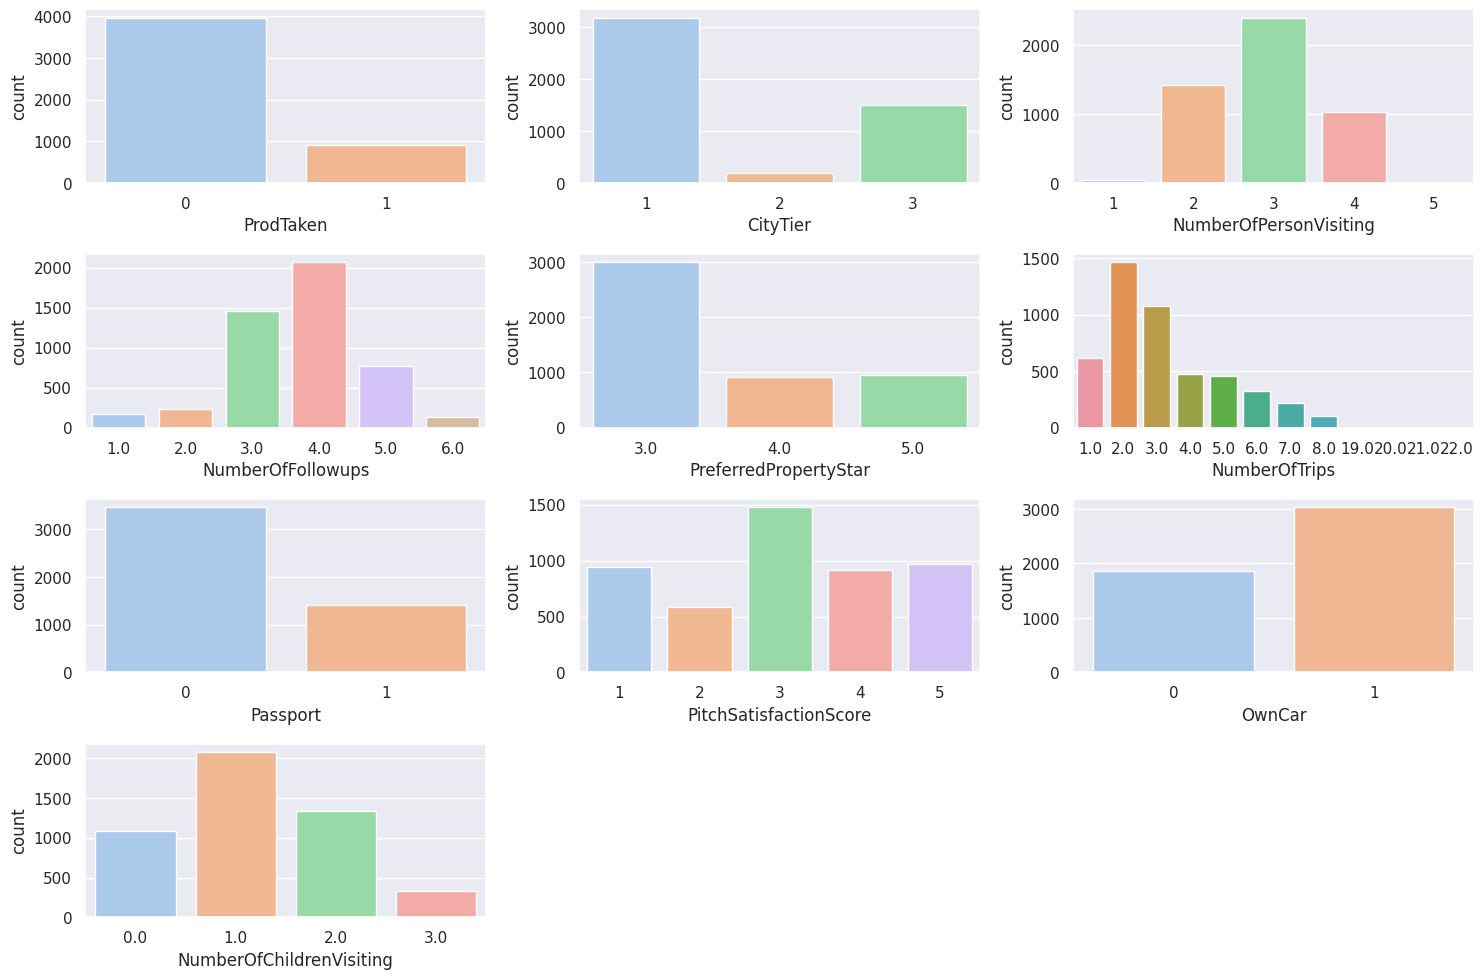

In [ ]:
plt.figure(figsize=(15,10))
for i in range(len(diskrit)):
    plt.subplot(4,3, i+1)
    sns.countplot(data=df, x=diskrit[i] )
    plt.tight_layout()

**INSIGHT COUNTPLOT**

- Pada kolom target (ProdTaken). Tedapat class imbalance atau ketimpangan data, dimana customer yang mengambil paket liburan (ProdTaken = 1) memiliki frequensi dibawah <1000. sedangkan customer yang tidak mengambil paket wisata (prodtaken =0 ) berjumlah sangat dominan, sekitar 4000 customer. Sehingga ketimpangan data pada target dapat diproses dengan undersampling / oversampling pada saat data preprocessing nanti
- Mayoritas customer merupakan bergender Male, Sudah Married, memiliki jabatan sebagai Manager & Executive, dan memiliki okupasi Salaried dan Small Business
- Teryata costumer yang memiliki Occupation sebagai freelancer sangat sedikit (0,04%) dari data yang ada.
- Terdapat outlier pada NumberOfTrips, MoneyIncome, DurationOfPitch. Sehingga harus dihilangkan outliernya pada saat pre-processing.


## **3. Multivariate Analysis**





<ipython-input-93-a80db9e78b66>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='BuGn',annot=True, fmt='.2f')


<Axes: >

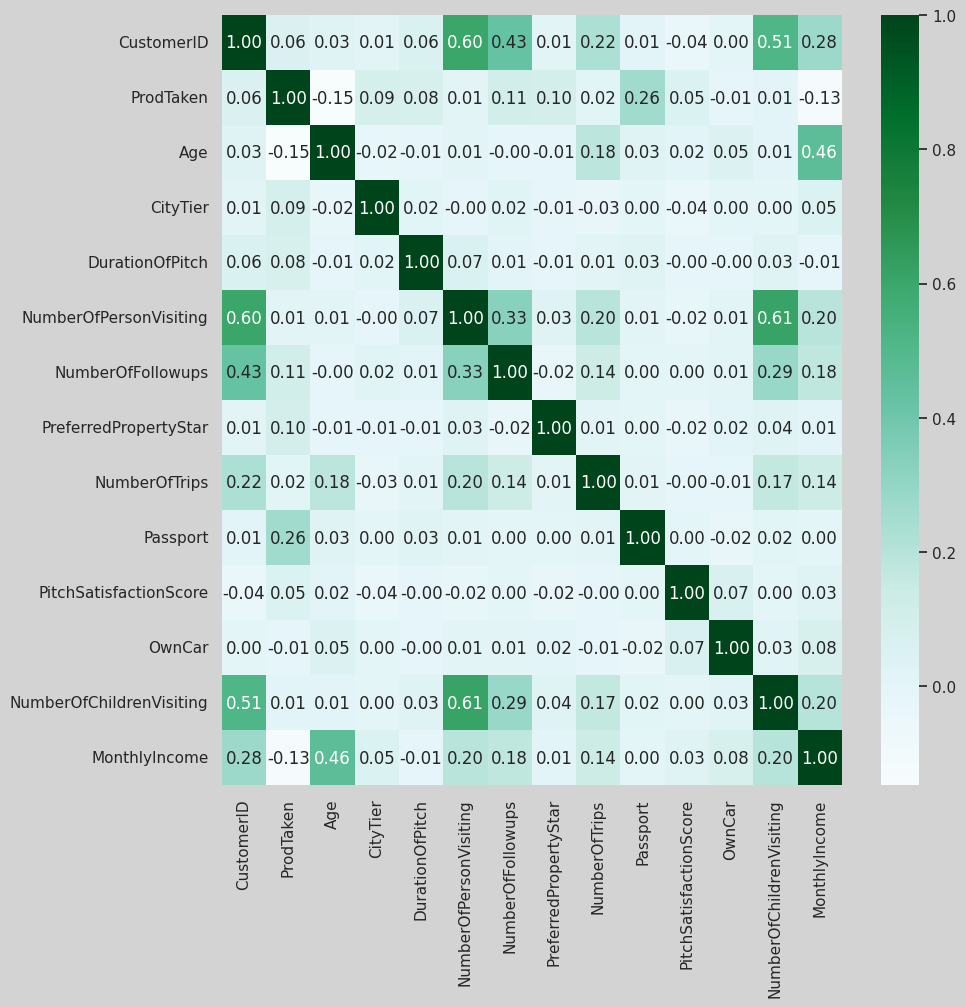

In [ ]:
plt.figure(figsize=(10,10), facecolor='lightgray')
sns.heatmap(df.corr(), cmap='BuGn',annot=True, fmt='.2f')

<Figure size 2000x2000 with 0 Axes>

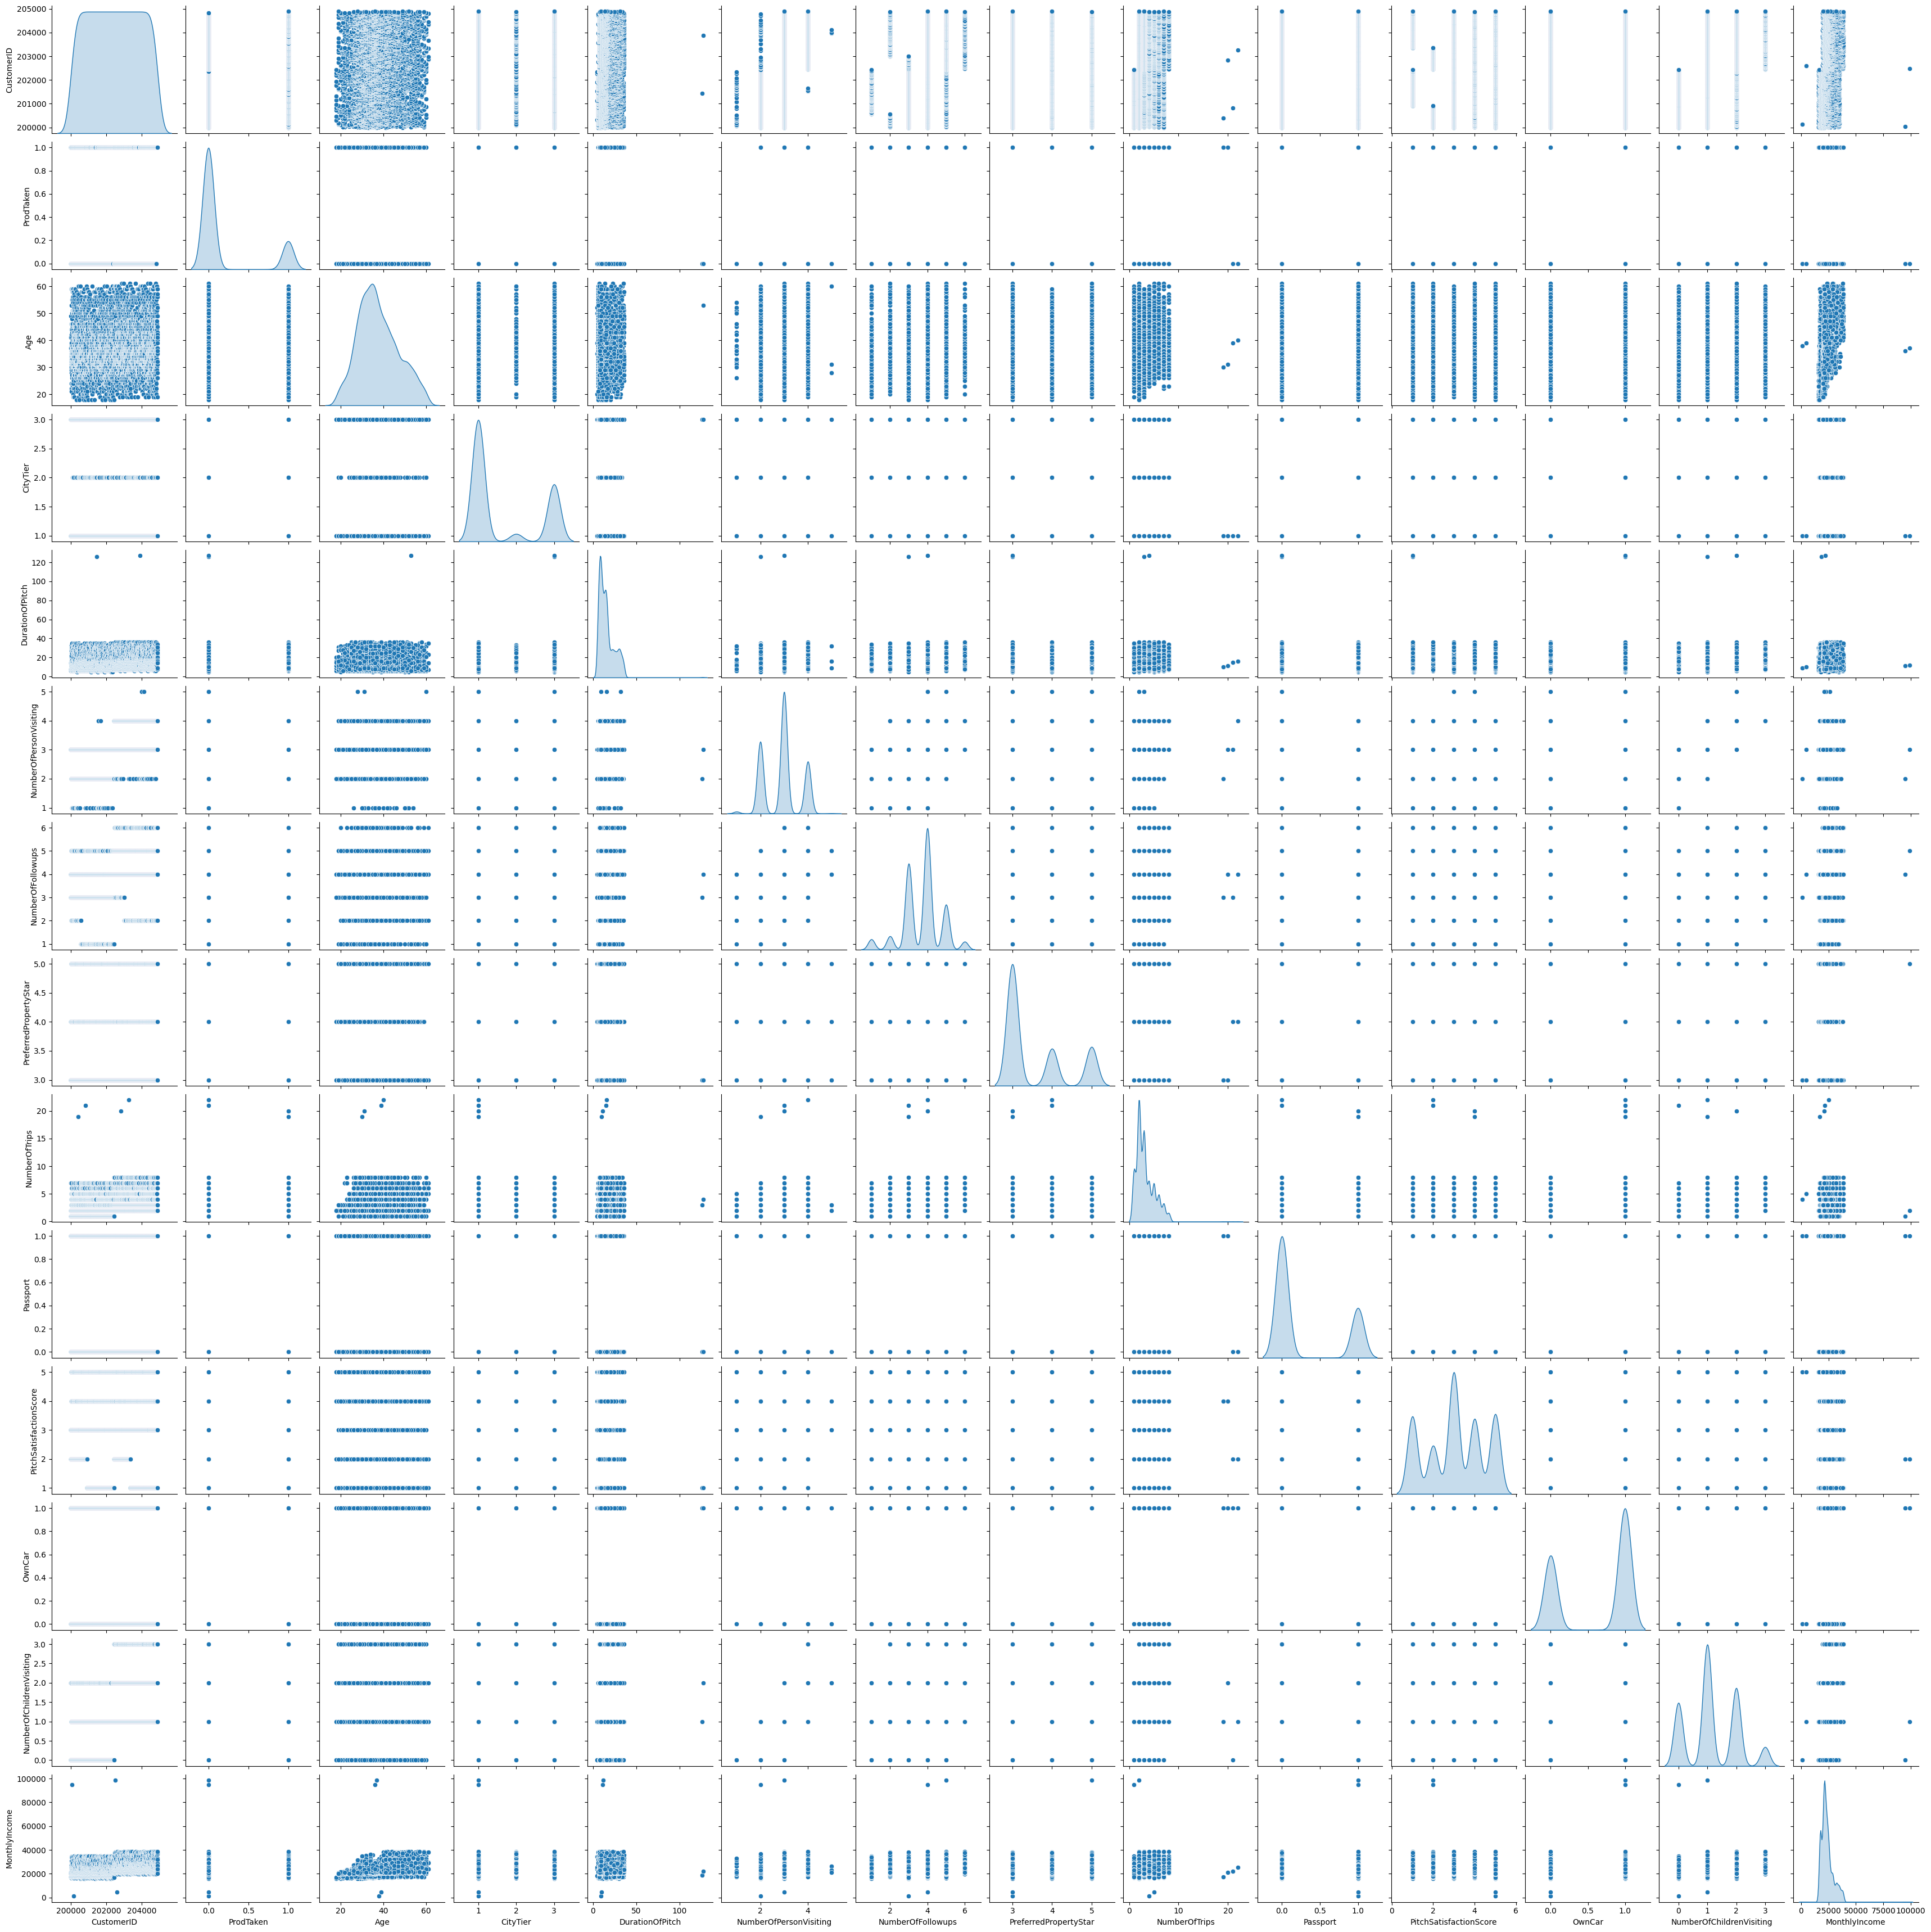

In [ ]:
plt.figure(figsize=(20, 20))
sns.pairplot(df, diag_kind='kde')

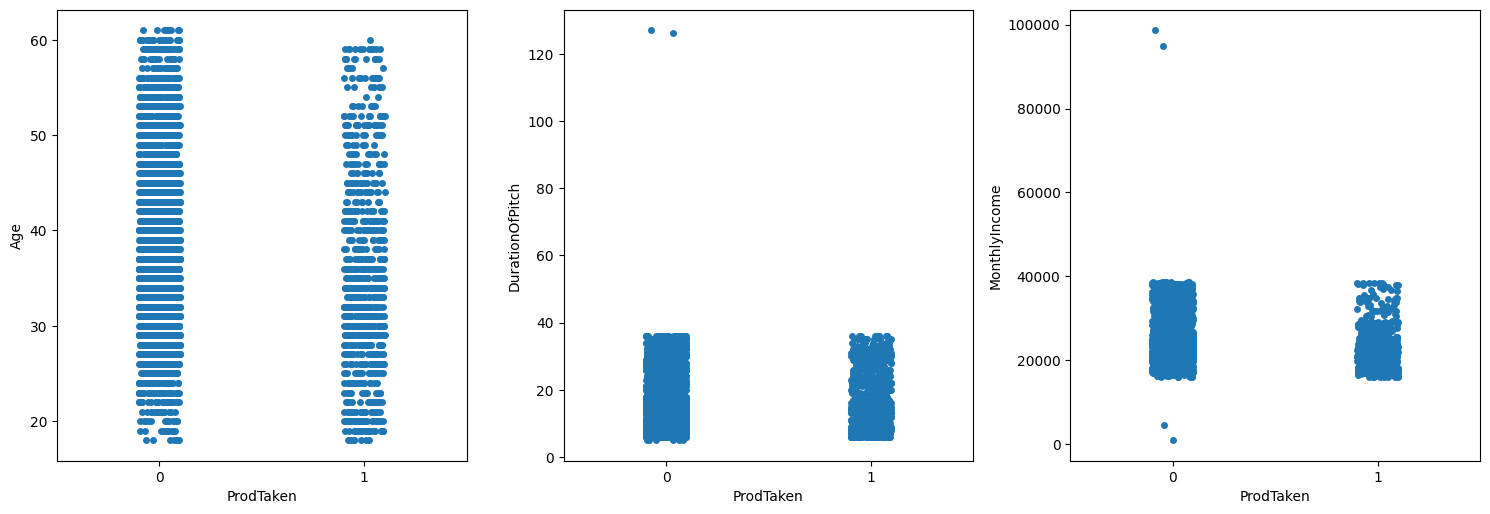

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='ProdTaken', y=num[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

**INSIGHT**

- Pada usia 20 - 40 Tahun, customer yang membeli paket wisata memiliki rata rata DurationOfPitch diangka 5 - 30 menit. Sedangkan customer yang tidak membeli paket wisata rata rata memiliki DurationOfPitch diangka 10 menit
- Kebanyakan yang membeli paket liburan berusia 20 - 35 Tahun, dengan pendapatan bulanan berada pada rentan 17000 - 23000. Sedangkan customer yang tidak mengambil paket, cenderung berada pada usia 25 - 50 Tahun dengan pendapatan rata rata diangka 20000
- Sebagian besar customer yang mengambil paket wisata, mengambil properti hotel bintang 3 sebagai opsi pertama, dan diikuti oleh hotel bintang 5 sebagai opsi keduanya. Sedangkan customer yang tidak mengambil paket liburan, dominan memilih hotel bintang 3

**INSIGHT**

- Dapat dilihat nilai korelasi pada variable target kita yaitu ProdTaken, terdapat korelasi positif walaupun lemah antara variable Passport terhadap ProdTaken yang berarti semakin tinggi nilai passport customer (1), maka semakin tinggi pula nilai ProdTaken nya atau customer yang memiliki passport lebih cenderung membeli tawaran paket dibandingkan dengan customer yang tidak memiliki passport

- Terdapat korelasi negatif yang lemah antara variable Age terhadap ProdTaken dan variable MonthlyIncome terhadap ProdTaken, yang berarti semakin kecil nilai Age/MonthlyIncome-nya maka semakin besar nilai ProdTaken-nya atau customer yang berumur kecil/muda lebih cenderung membeli tawaran paket liburan dibandingkan dengan customer yang berumur tua, dan customer yang bergaji kecil cenderung membeli tawaran paket liburan dibandingkan dengan customer yang bergaji besar

- Terdapat 2 fitur yang memiliki korelasi yang cukup kuat, yaitu NumberOfPersonVisiting dan NumberOfChildrenVisiting. dimana membentuk positif korelasi. Sehingga pada proses feature selection, kita dapat mengeliminasi fitur yang redundan(mempunyai informasi serupa) agar tidak terjadi overfitting pada model machine learning nantinya

## **4. Business Insight**

### **1. Apakah kepemilikan Passport mempengaruhi keputusan pelanggan untuk membeli tawaran paket liburan?**

In [ ]:
import matplotlib.style as style
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [ ]:
df_passport = df.groupby(['Passport','ProdTaken']).agg({'CustomerID' : ['nunique']}).reset_index()
df_passport.columns = ['Passport','ProdTaken','Total Customer']
df_passport

,Passport,ProdTaken,Total Customer
0,0,0,3040
1,0,1,426
2,1,0,928
3,1,1,494


In [ ]:
#menjumlahkan total customer per Passport
df_passport1 = df_passport.groupby('Passport').agg({'Total Customer' : ['sum']}).reset_index()
df_passport1.columns = ['Passport','Total Customer per Passport']

#merge df yg tadi ke df yang lama
df_merge = df_passport.merge(df_passport1, on='Passport')

#membuat column baru yang berisikan persentase
df_merge['Percentage'] = round((df_merge['Total Customer'] / df_merge['Total Customer per Passport']) * 100,2)
df_merge

,Passport,ProdTaken,Total Customer,Total Customer per Passport,Percentage
0,0,0,3040,3466,87.71
1,0,1,426,3466,12.29
2,1,0,928,1422,65.26
3,1,1,494,1422,34.74


Text(0.8, 958, '928')

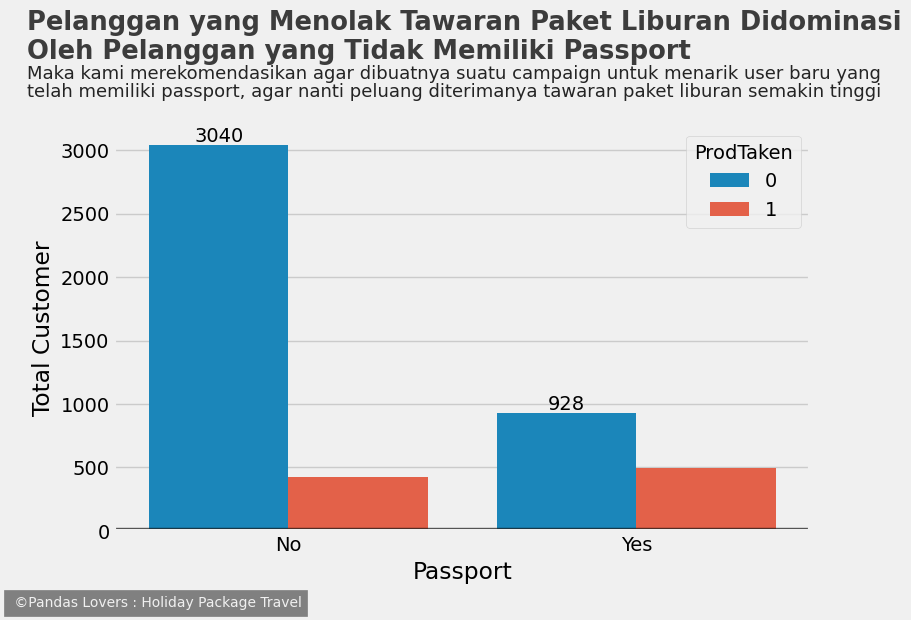

In [ ]:
#membuat grafik
style.use('fivethirtyeight')

plt.figure(figsize=(8,5))

sns.barplot(x='Passport',y='Total Customer',data=df_merge,hue='ProdTaken')

plt.text(x = 0-0.75, y = 3950,
          s = 'Pelanggan yang Menolak Tawaran Paket Liburan Didominasi', 
          fontsize = 18.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-0.75, y = 3725,
          s = 'Oleh Pelanggan yang Tidak Memiliki Passport', 
          fontsize = 18.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-0.75, y = 3560,
         s = 'Maka kami merekomendasikan agar dibuatnya suatu campaign untuk menarik user baru yang', 
         fontsize = 13, alpha = .85)
plt.text(x = 0-0.75, y = 3420,
         s = 'telah memiliki passport, agar nanti peluang diterimanya tawaran paket liburan semakin tinggi', 
         fontsize = 13, alpha = .85)
plt.text(x = -0.80, y = -600,
    s = ' ©Pandas Lovers : Holiday Package Travel',fontsize = 10, 
               color = '#f0f0f0', backgroundcolor = 'grey')

plt.axhline(y = 0, color = 'black', linewidth = 5.3, alpha = .7)


plt.xticks(ticks=[0,1], labels=['No','Yes'])


plt.text(x = 0-0.20, y = 3040+30, s = "3040", ha='center')
plt.text(x = 1-0.20, y = 928+30, s = "928", ha='center')

### **2. Apakah umur mempengaruhi keputusan pelanggan untuk membeli tawaran paket liburan atau tidak?**

Text(-0.8, -0.008, ' ©Pandas Lovers : Holiday Package Travel')

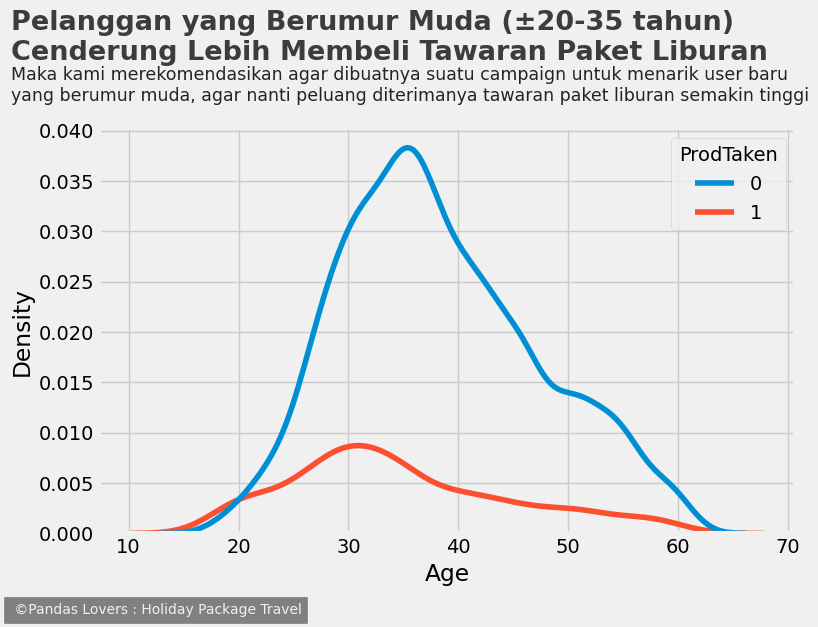

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='Age', data=df, hue='ProdTaken')

plt.text(x = 0-0.75, y = 0.050,
          s = 'Pelanggan yang Berumur Muda (±20-35 tahun)', 
          fontsize = 19.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-0.75, y = 0.047,
          s = 'Cenderung Lebih Membeli Tawaran Paket Liburan', 
          fontsize = 19.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-0.75, y = 0.045,
         s = 'Maka kami merekomendasikan agar dibuatnya suatu campaign untuk menarik user baru', 
         fontsize = 12.5, alpha = .85)
plt.text(x = 0-0.75, y = 0.043,
         s = 'yang berumur muda, agar nanti peluang diterimanya tawaran paket liburan semakin tinggi', 
         fontsize = 12.5, alpha = .85)
plt.text(x = -0.80, y = -0.008,
    s = ' ©Pandas Lovers : Holiday Package Travel',fontsize = 10, 
               color = '#f0f0f0', backgroundcolor = 'grey')

### **3. Apakah gaji mempengaruhi keputusan pelanggan untuk membeli tawaran paket liburan atau tidak?**

Text(-16000, -2e-05, ' ©Pandas Lovers : Holiday Package Travel')

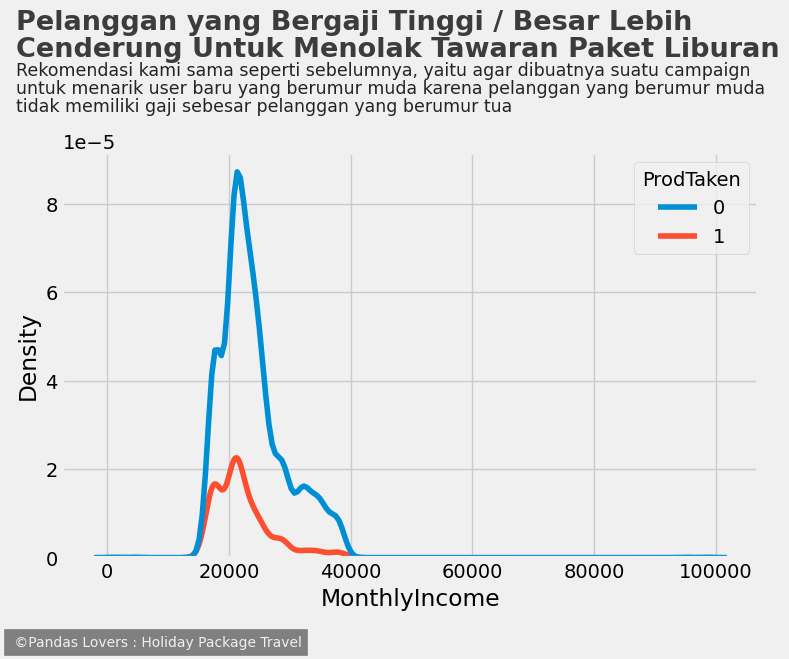

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='MonthlyIncome', data=df, hue='ProdTaken')
plt.text(x = 0-15000, y = 0.0001195,
          s = 'Pelanggan yang Bergaji Tinggi / Besar Lebih', 
          fontsize = 19.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-15000, y = 0.0001135,
          s = 'Cenderung Untuk Menolak Tawaran Paket Liburan', 
          fontsize = 19.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-15000, y = 0.000109,
         s = 'Rekomendasi kami sama seperti sebelumnya, yaitu agar dibuatnya suatu campaign', 
         fontsize = 12.5, alpha = .85)
plt.text(x = 0-15000, y = 0.000105,
         s = 'untuk menarik user baru yang berumur muda karena pelanggan yang berumur muda', 
         fontsize = 12.5, alpha = .85)
plt.text(x = 0-15000, y = 0.000101,
         s = 'tidak memiliki gaji sebesar pelanggan yang berumur tua', 
         fontsize = 12.5, alpha = .85)
plt.text(x = -16000, y = -0.00002,
    s = ' ©Pandas Lovers : Holiday Package Travel',fontsize = 10, 
               color = '#f0f0f0', backgroundcolor = 'grey')

# **DATA PRE-PROCESSING**

In [ ]:
#Code


# **MACHINE LEARNING MODELLING & EVALUATION**

In [ ]:
# CODE